In [8]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input,decode_predictions
from keras.preprocessing import image
from keras.layers import Lambda, Dense, Flatten
from keras.models import Model
from glob import glob
import PIL
from PIL import Image
import os
import cv2
import random

In [9]:
Train_path = './pizza_not_pizza/Train/'
Test_path = './pizza_not_pizza/Test'
IMAGE_SIZE = [225,225]

In [10]:
folder = glob('./pizza_not_pizza/Train/'),glob('./pizza_not_pizza/Test/')

In [11]:
Train_generation = ImageDataGenerator(rescale=1./25,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
Test_generation = ImageDataGenerator(rescale=1./25)

In [12]:
training_set = Train_generation.flow_from_directory('./pizza_not_pizza/Train/',
                                                    color_mode= 'rgb',
                                                    shuffle= True,
                                                    target_size = (224,224),
                                                    batch_size = 32,
                                                    class_mode = 'categorical')
testing_set = Test_generation.flow_from_directory('./pizza_not_pizza/Test/',
                                                    color_mode= 'rgb',
                                                    shuffle= True,
                                                    target_size = (224,224),
                                                    batch_size = 32,
                                                    class_mode = 'categorical')

Found 1376 images belonging to 2 classes.
Found 590 images belonging to 2 classes.


In [13]:
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in vgg.layers:
  layer.trainable = False
x = Flatten()(vgg.output) 
prediction = Dense(len(folder), activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

In [14]:
vgg.input.shape

TensorShape([None, 225, 225, 3])

In [15]:
prediction.shape

TensorShape([None, 2])

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']) 
history = model.fit(training_set, validation_data=testing_set, epochs=12
                    
                    , batch_size=64
                    )

Epoch 1/12
43/43 [==============================] - 1381s 32s/step - loss: 1.2210 - accuracy: 0.7573 - val_loss: 0.5558 - val_accuracy: 0.8610
Epoch 2/12
43/43 [==============================] - 1816s 42s/step - loss: 0.6655 - accuracy: 0.8474 - val_loss: 0.4671 - val_accuracy: 0.9034
Epoch 3/12
43/43 [==============================] - 873s 18s/step - loss: 0.5041 - accuracy: 0.8750 - val_loss: 0.3337 - val_accuracy: 0.9271
Epoch 4/12
43/43 [==============================] - 708s 16s/step - loss: 0.3584 - accuracy: 0.9019 - val_loss: 0.3400 - val_accuracy: 0.9220
Epoch 5/12
43/43 [==============================] - 772s 18s/step - loss: 0.2871 - accuracy: 0.9237 - val_loss: 0.3968 - val_accuracy: 0.9203
Epoch 6/12
43/43 [==============================] - 855s 20s/step - loss: 0.2528 - accuracy: 0.9288 - val_loss: 0.4104 - val_accuracy: 0.9169
Epoch 7/12
43/43 [==============================] - 820s 19s/step - loss: 0.2698 - accuracy: 0.9346 - val_loss: 0.4246 - val_accuracy: 0.9254
Epoc

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 225, 225, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 225, 225, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 225, 225, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

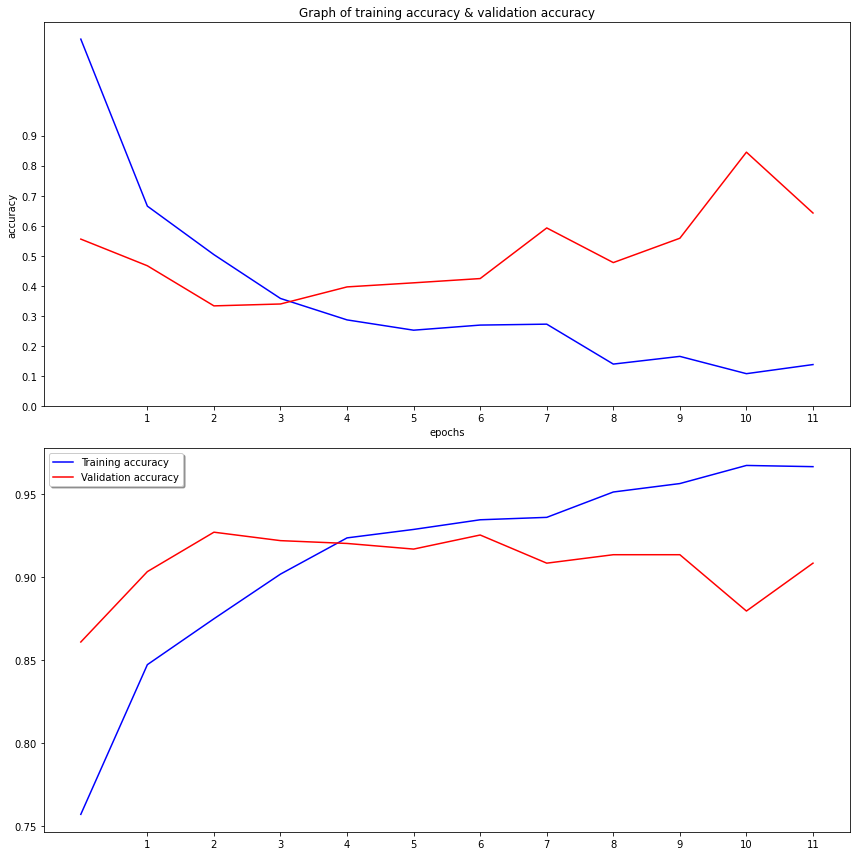

In [18]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# plot graph of training loss & validation loss
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 12, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))
ax1.set_xlabel("epochs")
ax1.set_ylabel("loss")
ax1.set_title("Graph of training loss & validation loss")

# plot graph of training accuracy & validation accuracy
ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 12, 1))
ax1.set_xlabel("epochs")
ax1.set_ylabel("accuracy")
ax1.set_title("Graph of training accuracy & validation accuracy")

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [19]:
from keras.models import load_model
model.save('model3.h5')